In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
df=pd.read_csv('Desktop\data set\Heart.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [6]:
df.shape

(303, 14)

In [7]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [8]:
df['ChestPain'].nunique()

4

In [9]:
df['Ca'].fillna(int(df['Ca'].mean()), inplace=True)

In [10]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
AHD          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
df['ChestPain']= le.fit_transform(df['ChestPain'])
df['Thal']= le.fit_transform(df['Thal'])
df['target']= le.fit_transform(df['AHD'])

In [15]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,target
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,No,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,Yes,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,Yes,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,No,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,No,0


In [16]:
df.drop(['AHD'],axis=1, inplace=True)


In [17]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    int32  
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    float64
 12  Thal       303 non-null    int32  
 13  target     303 non-null    int32  
dtypes: float64(2), int32(3), int64(9)
memory usage: 29.7 KB


plt.figure(figsize=(20,10))
plt.subplot(121)
sns.countplot(x='LIMIT_BAL',hue='def_pay',data=df)

In [19]:
df.describe()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,0.841584,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,1.339934,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.597973,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,3.000000,1.000000


In [22]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


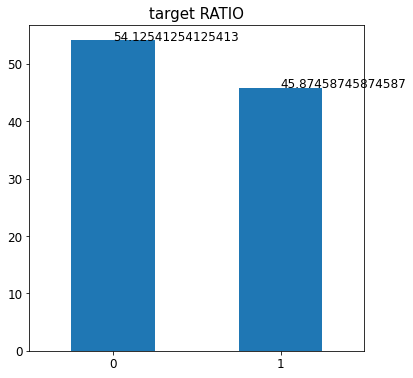

In [23]:
def_cnt = (df.target.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("target RATIO", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

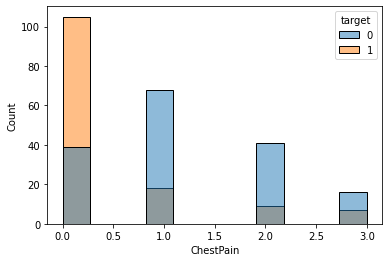

In [34]:
sns.histplot(data=df,x='ChestPain',hue='target');
plt.show()

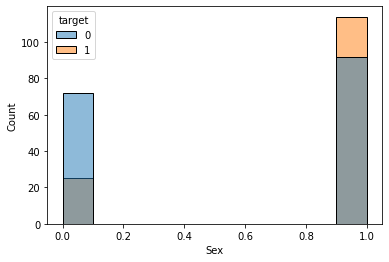

In [35]:
sns.histplot(data=df,x='Sex',hue='target');
plt.show()

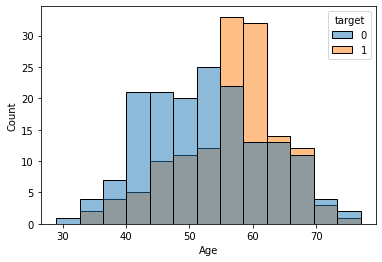

In [36]:
sns.histplot(data=df,x='Age',hue='target');
plt.show()

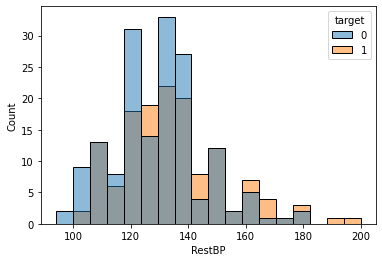

In [37]:
sns.histplot(data=df,x='RestBP',hue='target');
plt.show()

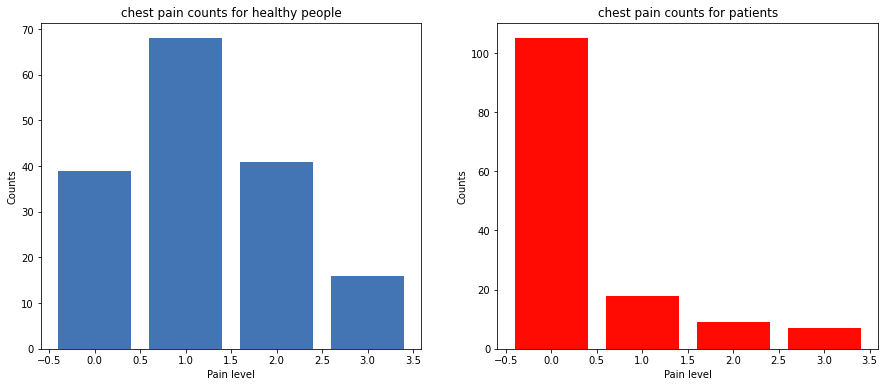

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.bar(df[df['target']==0].ChestPain.value_counts().index, df[df['target']==0].ChestPain.value_counts(), color="#4374B3");
ax1.set_xlabel('Pain level');
ax1.set_ylabel('Counts');
ax1.set_title('chest pain counts for healthy people');

ax2.bar(df[df['target']==1].ChestPain.value_counts().index, df[df['target']==1].ChestPain.value_counts(), color="#FF0B04")
ax2.set_xlabel('Pain level');
ax2.set_ylabel('Counts');
ax2.set_title('chest pain counts for patients');

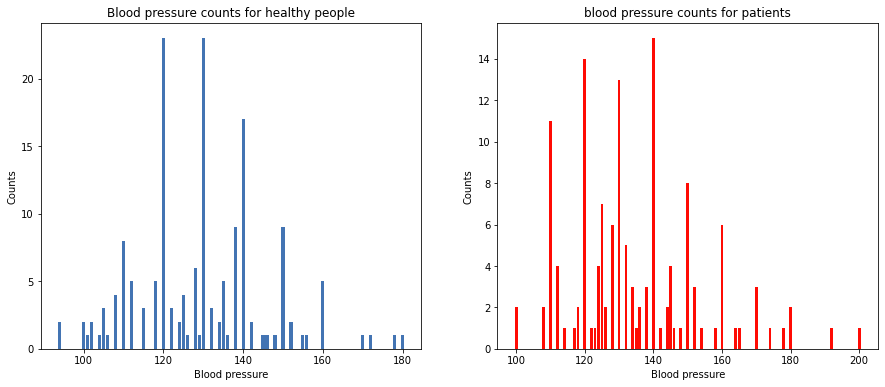

In [55]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.bar(df[df['target']==0].RestBP.value_counts().index, df[df['target']==0].RestBP.value_counts(), color="#4374B3");
ax1.set_xlabel('Blood pressure');
ax1.set_ylabel('Counts');
ax1.set_title('Blood pressure counts for healthy people');

ax2.bar(df[df['target']==1].RestBP.value_counts().index, df[df['target']==1].RestBP.value_counts(), color="#FF0B04")
ax2.set_xlabel('Blood pressure');
ax2.set_ylabel('Counts');
ax2.set_title('blood pressure counts for patients');

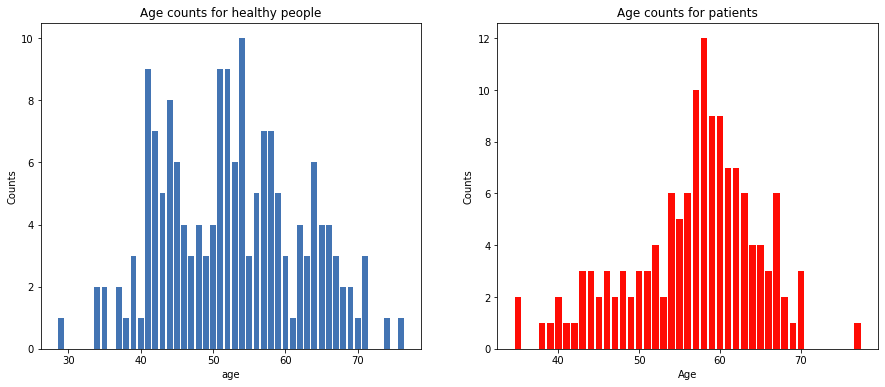

In [54]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.bar(df[df['target']==0].Age.value_counts().index, df[df['target']==0].Age.value_counts(), color="#4374B3");
ax1.set_xlabel('age');
ax1.set_ylabel('Counts');
ax1.set_title('Age counts for healthy people');

ax2.bar(df[df['target']==1].Age.value_counts().index, df[df['target']==1].Age.value_counts(), color="#FF0B04")
ax2.set_xlabel('Age');
ax2.set_ylabel('Counts');
ax2.set_title('Age counts for patients');

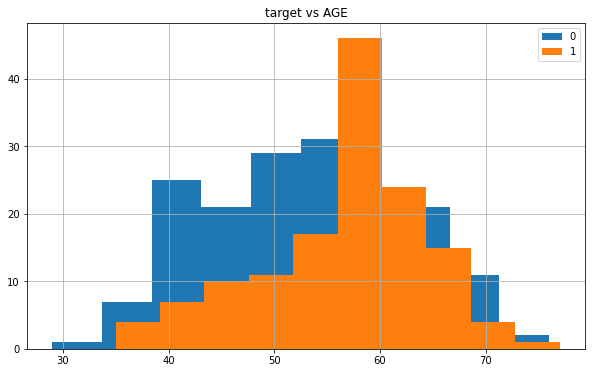

In [57]:
plt.figure(figsize=(10,6))
df.groupby('target')['Age'].hist(legend=True)
plt.title ('target vs AGE')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

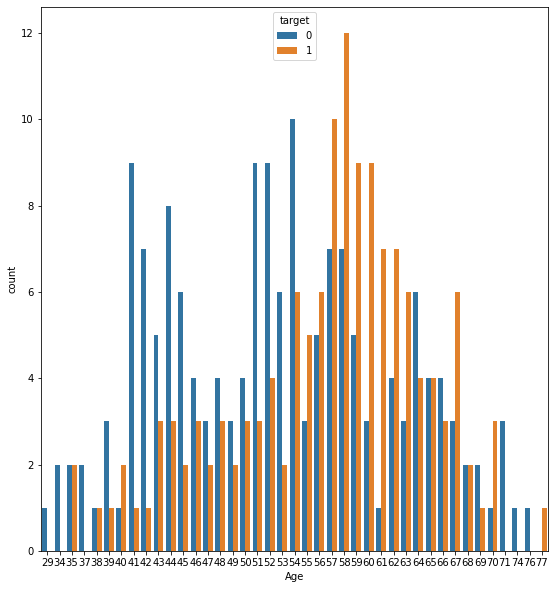

In [60]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.countplot(x='Age',hue='target',data=df)

1=male,0=female

<AxesSubplot:xlabel='Sex', ylabel='count'>

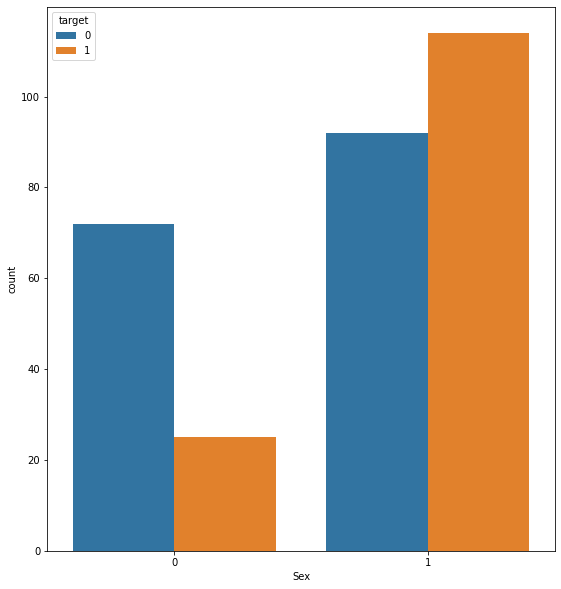

In [61]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.countplot(x='Sex',hue='target',data=df)

C:\Users\Sanjeev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'risk Distribution')

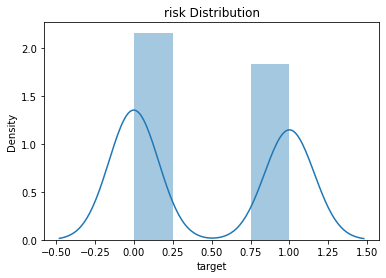

In [64]:
sns.distplot(df['target'])
plt.title('risk Distribution')

C:\Users\Sanjeev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'risk Distribution')

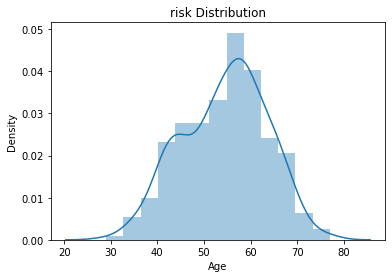

In [65]:
sns.distplot(df['Age'])
plt.title('risk Distribution')

C:\Users\Sanjeev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sex Distribution')

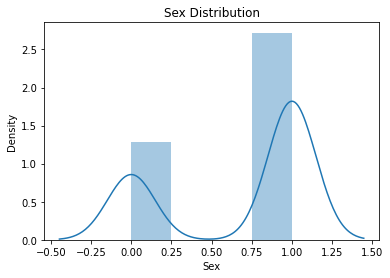

In [67]:
sns.distplot(df['Sex'])
plt.title('Sex Distribution')

C:\Users\Sanjeev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BP Distribution')

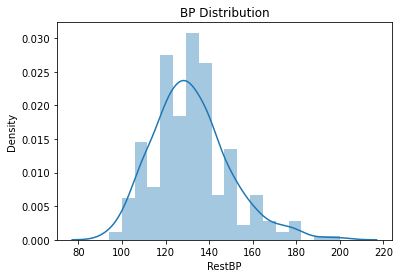

In [68]:
sns.distplot(df['RestBP'])
plt.title('BP Distribution')

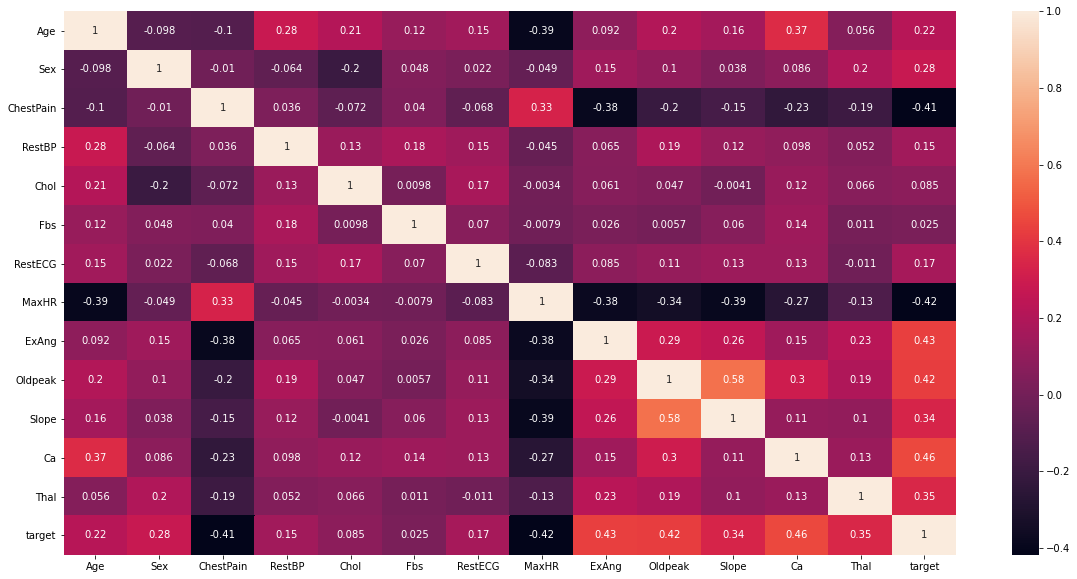

In [69]:
plt.subplots(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [71]:
df.drop(['Slope'],axis=1,inplace=True)

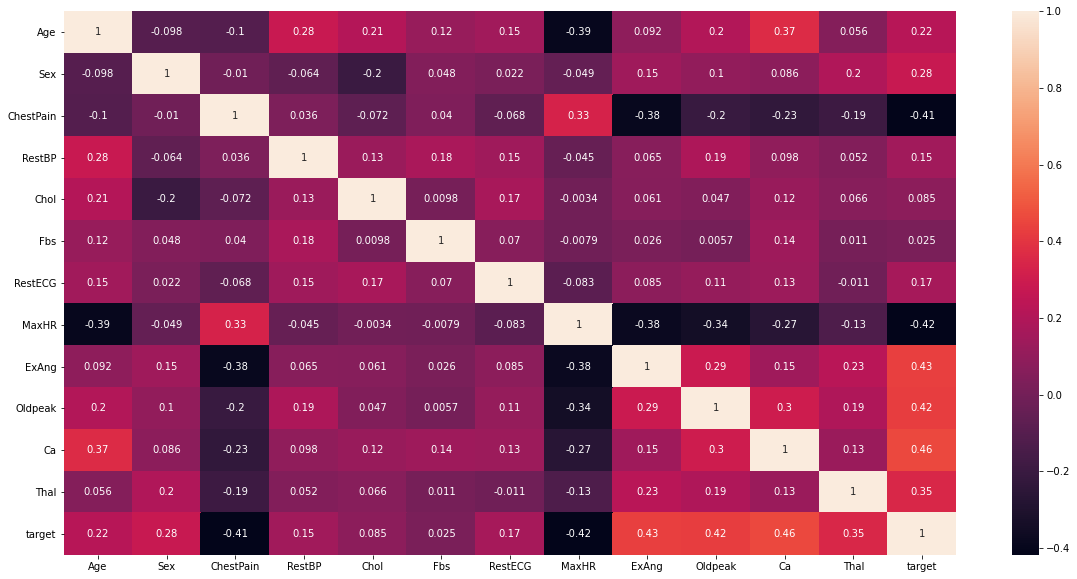

In [72]:
plt.subplots(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [73]:
X= df.drop(['target' ],axis=1)
Y = df['target']


In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [78]:
sc=StandardScaler()

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)


In [93]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((212, 12), (91, 12), (212,), (91,))

In [94]:
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [95]:
X_train.shape

(212, 12)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [97]:
log=LogisticRegression()

In [98]:
log.fit(X_train,y_train)

LogisticRegression()

In [99]:
y_pred=log.predict(X_test)

In [100]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1])

In [101]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,plot_roc_curve,accuracy_score

In [103]:
cm=confusion_matrix(y_test,y_pred)

In [104]:
cm

array([[42,  7],
       [ 7, 35]], dtype=int64)

In [105]:
accuracy_score(y_test,y_pred)

0.8461538461538461